# ANALIZA PODATKOV SPLETNE STRANI "ARCHIVE OF OUR OWN"

## Archive Of Our Own

Archive Of Our Own, bolje poznana pod imenom "AO3" je neprofitna, nekomercialna spletna stran, ki služi kot arhiv "fanficov". To so (ponavadi) krajše fiktivne zgodbe, ki so jih napisali ljubitelji neke knjige, filma, glasbene skupine... Zgodbe vsebujejo like, dogodke ali kraje, vzete iz izbranega področja, v angleščini imenovanega "fandom". Angleška beseda je nastala po vzorcu besede "kingdom", v slovenščini pa prevoda nimamo. Vseeno lahko besedo "fandom" razlagamo kot subkulturo ali skupnost, katere člani so ljubitelji iste stvari.

Na spletni strani lahko uporabniki zastonj pišejo in objavljajo svoje zgodbe, prav tako pa lahko berejo, komentirajo, všečkajo... ostala objavljena dela. Ta so najprej razvrščena po različnih področjih kot so Knjige in literatura, Filmi in serije, Videoigre, Znane osebnosti..., nato pa še podrobneje na specifične knjige, filme, igre... Za vse zgodbe, ki ne ustrezajo nobenemu specifičnemu področju, pa je namenjena kategorija "Uncategorised fandoms", kjer so večinoma zbrana čisto originalna dela.

## Kratek opis naloge

Najprej bomo analizirali število del in specifičnih "fandomov" glede na širše kategorije. Pri tem izpustimo prej omenjeno kategorijo "Uncategorised Fandoms", saj ne vsebuje podatkov o dejanskih področij ampak zgolj originalna dela. Nato si bomo podrobneje pogledali 1000 najbolj priljubljenih del na temo knjžne serije Harry Potter, kar je trenutno tudi najbolj priljubljen "fandom" v kategoriji "Knjige in literatura".

## Priprava na analizo
Preden začnemo, si pripravimo okolje.

In [378]:
import pandas as pd
pd.set_option('display.max_rows', 10)
import matplotlib.pyplot as plt


Uvozimo podatke o "fandomih" in delih o Harryju Potterju.

In [379]:
pot_dela='podatki/dela.csv'
pot_fandomi='podatki/fandomi.csv'
dela=pd.read_csv(pot_dela)
fandomi=pd.read_csv(pot_fandomi)

## Analiza fandomov

Poglejmo si najprej 10 najbolj priljubljenih fandomov. Dober kriterij za to je število del, ki so bila objavljena za to področje.

In [380]:
fandomi.sort_values("število del", ascending=False, inplace=True)
fandomi=fandomi.reset_index(drop=True)
fandomi.index=fandomi.index+1
naj_10=fandomi.head(10)
naj_10

,vrsta fandoma,fandom,število del
1,Celebrities & Real People,Real Person Fiction,764303
2,Music & Bands,K-pop,709325
3,TV Shows,Marvel,647349
4,Cartoons & Comics & Graphic Novels,Marvel,647349
5,Movies,Marvel,647349
6,Movies,Harry Potter - J. K. Rowling,537058
7,Video Games,Harry Potter - J. K. Rowling,537058
8,Books & Literature,Harry Potter - J. K. Rowling,537058
9,Movies,Marvel Cinematic Universe,520890
10,Cartoons & Comics & Graphic Novels,Marvel Cinematic Universe,520890


In [381]:
# glejmo brez vrste fandoma
brez_vrste=fandomi[['fandom','število del']].copy()
brez_vrste.head(10)

,fandom,število del
1,Real Person Fiction,764303
2,K-pop,709325
3,Marvel,647349
4,Marvel,647349
5,Marvel,647349
6,Harry Potter - J. K. Rowling,537058
7,Harry Potter - J. K. Rowling,537058
8,Harry Potter - J. K. Rowling,537058
9,Marvel Cinematic Universe,520890
10,Marvel Cinematic Universe,520890


Nekateri "fandomi" so zaradi same vsebine lahko razvrščeni pod več področij. Zgoraj vidimo, da se recimo Marvel pojavi kar trikrat, saj spada pod filme, serije in tudi stripe. Da bi tako širokemu pojmu določili le eno izmed teh kategorij bi bilo ne samo krivično, temveč bi tudi v nadaljevnaju vodilo do morda ne najbolj zanesljivih rezultatov. V naprej se je zato dobro zavedati, da različne kategorije niso nujno disjunktne množice fandomov. To bo močno pomagalo pri razumevanju naslednjih grafov, v katerih so prikazani deleži, ki jih posamezne kategorije zastopajo.

Deleže lahko izračunamo na dva načina: štejemo lahko število fandomov ali število vseh del znotraj kategorije. 

In [382]:
vrste=fandomi[['vrsta fandoma','število del']].copy()
vrste=vrste.groupby('vrsta fandoma').sum('število del')
vrste.sort_values('število del', ascending= False, inplace=True)
vrste=vrste.reset_index()
vrste.index=vrste.index +1
vsa_dela= vrste['število del'].sum()
vrste['delež (v %)']=((vrste['število del']/vsa_dela)*100).round(1)

In [383]:
vrste

,vrsta fandoma,število del,delež (v %)
1,TV Shows,6189778,17.4
2,Movies,5881969,16.5
3,Cartoons & Comics & Graphic Novels,4997354,14.0
4,Video Games,4604194,12.9
5,Books & Literature,3654480,10.3
6,Anime & Manga,2958121,8.3
7,Other Media,2599326,7.3
8,Celebrities & Real People,2270017,6.4
9,Music & Bands,2224604,6.3
10,Theater,190181,0.5


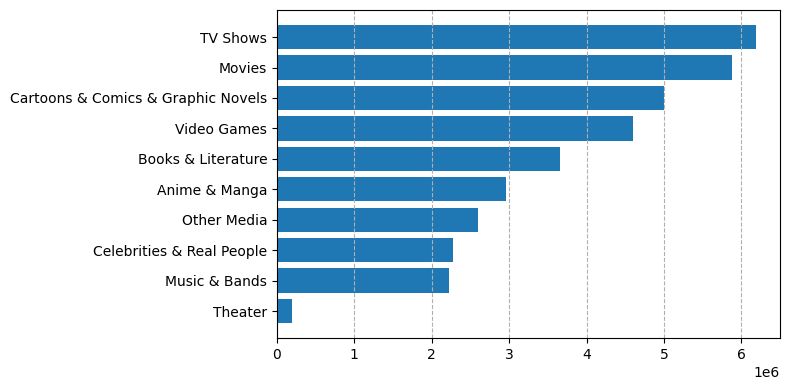

In [384]:
graf1=vrste.sort_values('število del')
plt.figure(figsize=(8,4))
bars=plt.barh(graf1['vrsta fandoma'], graf1['število del'])
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
stevila=[i for i in range(50000,6500000) if i%500000==0]



<Axes: >

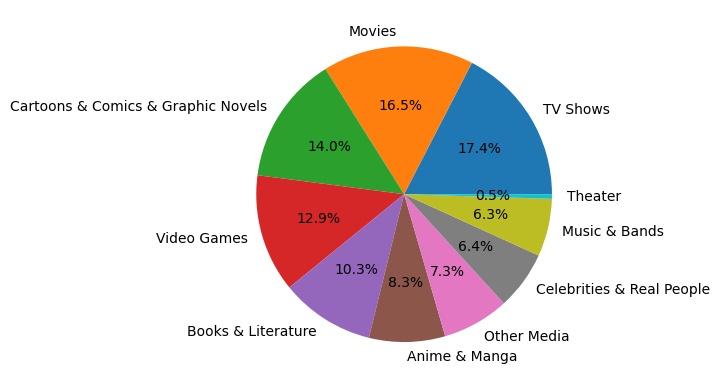

In [385]:

vrste.plot(kind='pie', y='delež (v %)', ylabel='',legend=False, autopct='%1.1f%%', labels=vrste['vrsta fandoma'])

In [386]:
st_fandomi=fandomi['vrsta fandoma'].value_counts()
st_fandomi=pd.DataFrame(st_fandomi)
st_fandomi.sort_values('count', inplace=True, ascending=False )
st_fandomi=st_fandomi.reset_index()
st_fandomi.rename(columns={'vrsta fandoma':'kategorija', 'count': 'število fandomov'}, inplace=True)
st_fandomi.index=st_fandomi.index+1
st_fandomi

,kategorija,število fandomov
1,Movies,12593
2,Books & Literature,12485
3,TV Shows,10394
4,Video Games,7333
5,Music & Bands,7067
6,Cartoons & Comics & Graphic Novels,5506
7,Anime & Manga,4746
8,Other Media,4459
9,Celebrities & Real People,2290
10,Theater,1551


<Axes: >

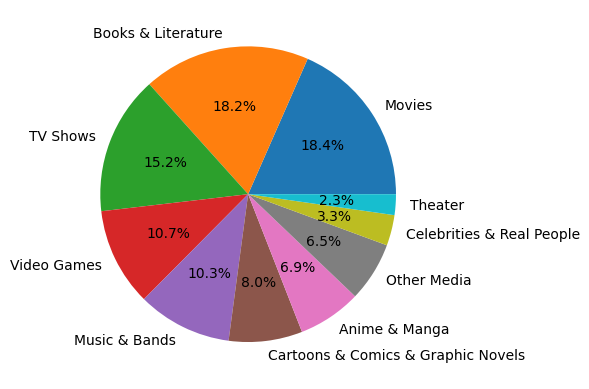

In [387]:
st_fandomi.plot(kind='pie', y='število fandomov', labels=st_fandomi['kategorija'],ylabel='', legend=False, autopct='%1.1f%%')

In [388]:
# primerjava obeh piechartov


Zanima nas količina del napisanih za različne fandome, ker pa je lahko to karkoli med 1 in več kot 700.000, je dobro število del zaokrožiti vsaj na 100.

In [389]:
#funkcija, ki zaokroži števila del na tk 100 in pol kok je kerih fandomov
#doda nov stolpec
#pogledamo pol graf i suppose
def zaokroži_100(x):
    return round(x, -2)
dela_zaokroženo=fandomi['število del'].apply(zaokroži_100)
fandomi['dela zaokroženo']=dela_zaokroženo
dela_100=fandomi['dela zaokroženo'].value_counts().to_frame()
dela_100.rename(columns={'count': 'št. fandomov'}, inplace=True)
dela_100.reset_index(inplace=True)
dela_100

,dela zaokroženo,št. fandomov
0,0,58087
1,100,4348
2,200,1438
3,300,726
4,400,446
...,...,...
349,117900,1
350,117700,1
351,103700,1
352,95600,1


<Figure size 640x480 with 0 Axes>

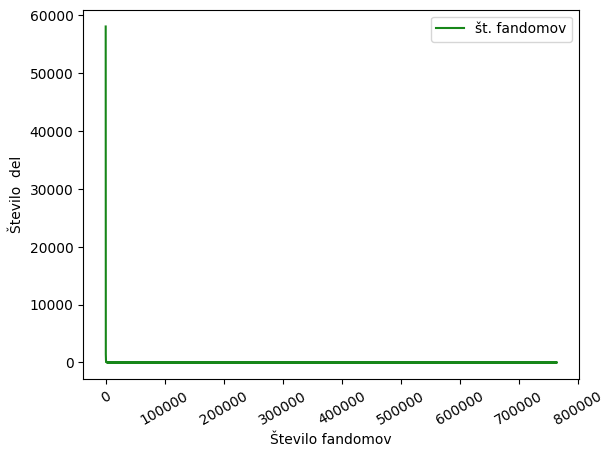

In [390]:

plt.figure()
graf=dela_100.plot(kind='line',y='št. fandomov',x='dela zaokroženo' , color='#178719')
graf.set_ylabel('Število  del')
graf.set_xlabel('Število fandomov')
plt.xticks(rotation=30)
plt.show()

Opazimo, da je *fandomov* z manj kot 50 del občutno več kot ostalih, zaradi česar je zgornji graf dokaj nekoristen. Da bodo podatki bolj reprezentativni, si poglejmo zgolj *fandome* z 500 ali manj del, pri šemer okrat dela zaokrožimo na 10.

In [ ]:

manjši_fandomi=fandomi[fandomi['število del']<=500].copy()
def zaokroži_10(x):
    return round(x,-1)
dela_10=manjši_fandomi['število del'].apply(zaokroži_10)
manjši_fandomi['dela zaokroženo']=dela_10
manjši_fandomi.sort_values('število del', inplace=True, ascending=False)
graf_10=manjši_fandomi['dela zaokroženo'].value_counts().to_frame()

,count
dela zaokroženo,
0,40601
10,9485
20,4167
30,1868
40,1490
...,...
450,38
440,37
490,30


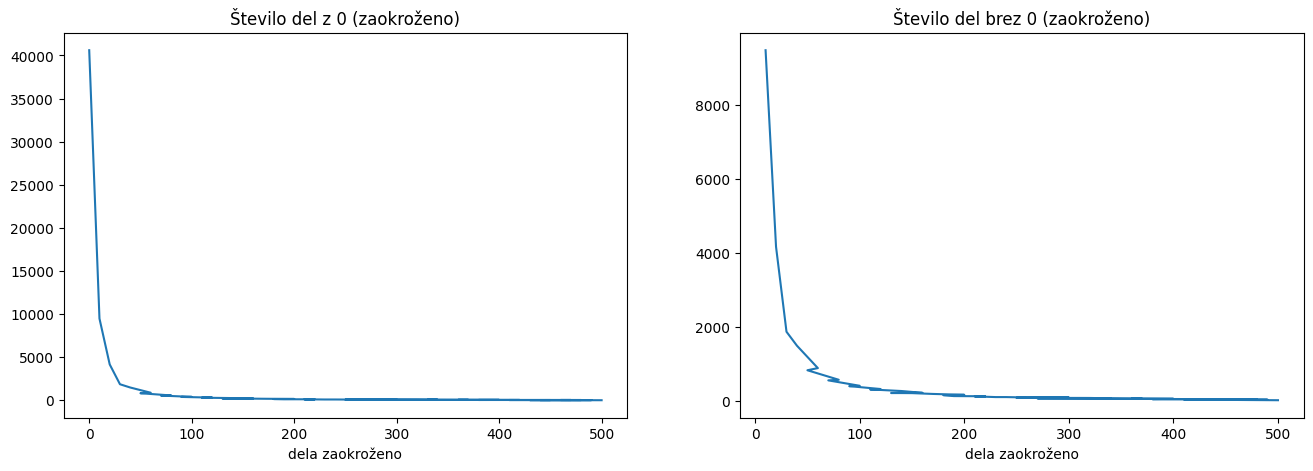

In [411]:
brez_0=graf_10[graf_10.index>0].copy()
fig, (a1,a2)=plt.subplots(1,2,figsize=(16,5))
graf_10.plot(kind='line',y='count', legend=False, ax=a1)
brez_0.plot(kind='line',y='count',legend=False, ax=a2)
a1.set_title('Število del z 0 (zaokroženo)')
a2.set_title('Število del brez 0 (zaokroženo)')
plt.show()


## Analiza del na temo *Harry Potter*

S spletne strani smo pobrali 1000 najbolj priljubljenih del o Harryju Potterju, pri čemer smo priljubljenost upoštevali gelede na število *kudosov*. Na tej spletni strani je to ekvivalentno všečkom. Zanimivi dve kategoriji, ki se tudi pojavita sta *hits* in *bookmarks*. *Hits* predstavlja kolikokrat so uporabniki odprli določeno delo - in ga posledično najverjetneje brali, *bookmarks* pa predstavlja število ljudi, ki so to delo na neki točki shranili, najverjetneje za branje pozneje. Zdi se vredno omeniti, da kategoriji *mesec* in *leto* predstvaljata okviren datum, ko je avtor delo nazadnje posodobil.

Sedaj ko vse kategorije malo bolje razumemo, se lotimo same analize.

In [393]:
dela.sort_values('kudos', inplace=True, ascending=False )
dela=dela.reset_index(drop=True)
dela.index=dela.index+1
dela

,naslov,mesec,leto,jezik,število besed,komentarji,kudos,bookmarks,hits,napisana poglavja,vsa poglavja,avtor
1,All the Young Dudes,11,2018,English,526969,44487,276722,49336,18157885,188,188,MsKingBean89
2,Draco Malfoy and the Mortifying Ordeal of Bein...,4,2022,English,199548,12685,89006,27901,4707503,36,36,isthisselfcare
3,Evitative,2,2020,English,222453,8403,80862,21865,2693248,29,29,Vichan
4,Lily's Boy,1,2022,English,746386,12760,77795,22793,4530812,109,109,SomewheresSword
5,Then Comes a Mist and a Weeping Rain,8,2011,English,21139,1313,76338,14321,928311,1,1,Faith Wood (faithwood)
...,...,...,...,...,...,...,...,...,...,...,...,...
996,A Beautiful Lie,11,2021,English,65840,1669,8114,2512,185548,14,ni podatka,Panis_fluvium
997,blood will tell but often it tells too much,8,2016,English,2489,278,8110,2468,62813,1,1,elumish
998,White Lies,12,2017,English,171013,512,8110,2461,271745,32,32,cassisluna
999,Finest in Fairford,8,2012,English,4997,180,8110,1049,68414,1,1,bluepeony


### Jezik

In [394]:
jeziki=dela['jezik'].value_counts().to_frame()
jeziki

,count
jezik,
English,999
Español,1


In [395]:
dela[dela['jezik']=='Español']

,naslov,mesec,leto,jezik,število besed,komentarji,kudos,bookmarks,hits,napisana poglavja,vsa poglavja,avtor
765,Draco Malfoy y los héroes del Olimpo,8,2025,Español,905336,13141,9378,354,335876,104,ni podatka,Luka_sama


Kot vidimo je le eno delo v španščini, vsa ostala so v angleščini. Glede na to, da smo zajeli le 1000 najbolj priljubljenih del, to ni tako presenetljivo. Vseh del na to temo je namreč več kot pol milijona, na sami spletni strani pa lahko brez dodatnega iskanja dostopamo le do 100.000 del. Glede na to, da so bila dela zajeta glede na priljubljenost raznolikosti v jezikih res ni mogoče pričakovati.

### Čas nastanka

Sama knjižna serija o mladem čarovniku je bila končana leta 2007, z izjemo dodatne knjige, ki je naknadno izšla leta 2016. Tudi filmi so nastali zgodaj, začeli so se namreč že pred zaključkom knjižne serije, zadnji pa je izšel leta 2011. Kljub temu je Harry Potter ostal dovolj popularen, da so fiktivna dela na to temo nastajala (in še nastajajo) dolgo po tem.

In [396]:
leta=dela['leto'].value_counts().to_frame()
leta=leta.reset_index()

<Figure size 400x300 with 0 Axes>

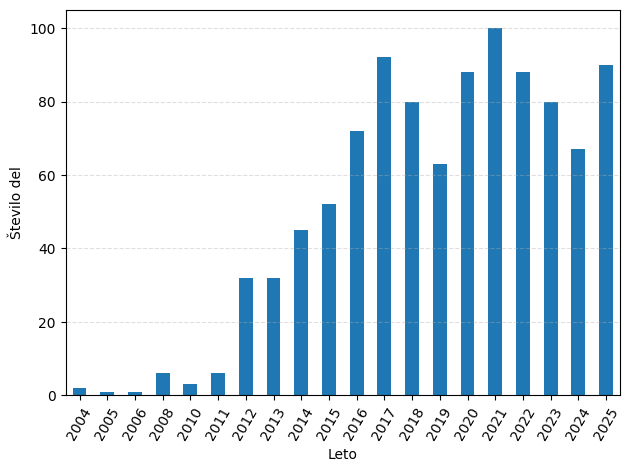

In [397]:
l1=leta.sort_values('leto', ascending=True)
plt.figure(figsize=(4,3))
l1.plot.bar(legend=False, y='count', x='leto')
plt.xlabel('Leto')
plt.ylabel('Število del')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
xl=[i for i in range(2004,2026)]
plt.xticks(rotation=60)
plt.show()

Na grafu lahko opazimo kar nekaj očitnejčih skokov. Prvi je med letoma 2006 in 2008, torej ravno po zaključku knjižne serije. Drugi, večji skok je po letu 2011, torej ravno ob koncu izida vseh filmov. Takrat je zgodba o Harryju Potterju dosegla dosti večjo množico ljudi, poleg tega pa dodala vsem ljubiteljem še dodatno vizualno predstavo krajev, likov in dogodkov, iz česar so nato najverjenteje črpali ideje za svoja fiktivna dela. 

Tretji večji skok je viden med letoma 2019 in 2020. Glede na to, da sama zgodba v tem času ni doživela kakšnega mejnika, je to najverjetneje posledica pandemije. Ljudje smo takrat v večini imeli več prostega časa kot sicer, poleg tega pa se je na družabnem omrežju TikTok v tem času razvila podskupina imenovana *BookTok*. Večina članov skupine je brala predvsem fantazijske knjige, delila mnenja in predloge, tako za otroke kot za odrasle. *BookTok* je postal dovolj popularen, da je imel vidne posledice v svetu prodaje knjig in vedno več ljudi je v branju knjig našlo svoj hobi. Glede na vse te podatke, bi si upala ugibati, da je ta preskok posledica pandemije in nastanka *BookTok*-a, najverjetneje bi podobno sliko dobili tudi pri ostalih dovolj znanih knjigah.

Še zadnji presenetljiv podatek pa je za leto 2025, saj leta sploh še ni konec a je že na tretjem mestu po številu del. Ob tem se spomnimo, da datum v resnici predstavlja zadnjo posodobitev oziroma objavo dela. To pomeni, da je najbrž dosti del, ki so bile nazadnje posodobljene letos, bilo v nastajanju že vsaj nekaj let prej in se bo število zadnjih posodobitev v letu 2025 s prihodom novega leta najverjetneje dosti zmanjšalo. Vseeno nam to da vedeti, da skoraj 20 let po izidu zadnje knjige, fiktivna dela na temo te serije še vedno nastajajo in bojo najverjetneje nastajala še kar nekaj časa. 

Izvzemši podatke iz leta 2025, lahko vseeno opazimo trendno črto od leta 2021 naprej, ki je dovolj podobna tisti od 2016 naprej, do pandemije. Popularnost Harryja Potterja vseeno počasi zamira, najpopularnejša pa ostajajo dela iz preteklih let. 

In [398]:
datum=dela[['mesec','leto']].copy()
# ustvarimo kriterij, ki enolično določi leto in mesecc
datum['skupaj']=datum['leto']*100+ datum['mesec']
st=datum['skupaj'].value_counts().to_frame()
st['leto']=st.index//100
st['mesec']=st.index%100

<Figure size 400x200 with 0 Axes>

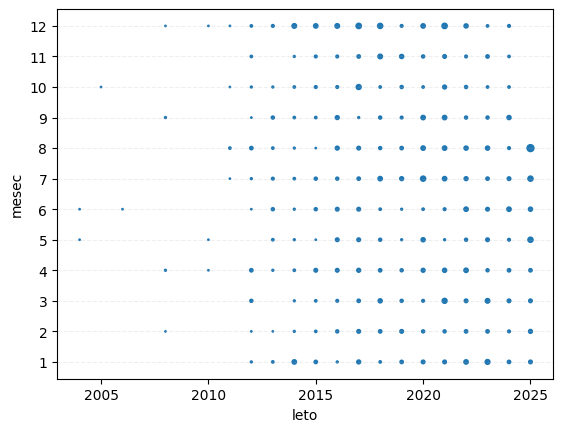

In [399]:
plt.figure(figsize=(4,2))
st.plot.scatter(y='mesec',x='leto',s='count')
yl=[i for i in range(1,13)]
plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.yticks(yl)
plt.show()

Vidimo lahko, da so dela nastajajo konstistentno že od leta 2014 vsak mesec. Opazen je tudi manjši porast del v decembru, za kar nekaj del tudi v poletnem času. Tudi na tem grafu vidimo navidezno porast del ne samo v tem letu temveč celo v tem mesecu. Podobno kot na prejšnjem grafu je to posledica zadnjih posodobitev, zato podatki za preteklih nekaj mesecov niso najbolj informativni.